In [1]:
import pandas as pd
df =pd.read_csv("ipl.csv")

In [2]:
# venue also impact on runs
# Aim : find out to total score
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [3]:
# Data Cleaning
# Removing unwanted columns

column_remove=['mid', 'batsman', 'bowler', 'striker', 'non-striker']
df.drop(column_remove,axis=1,inplace=True)

In [4]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [5]:
#keep only consistent team
consistent_team =['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

In [6]:
#keeping ony team which r right now present
df= df[df['bat_team'].isin(consistent_team) & df['bowl_team'].isin(consistent_team) ]
df.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [7]:
# Removing the first 5 overs data in every match
# at least 5 over to predict run
df =df[df['overs']>=5.0]

In [8]:
df

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222
...,...,...,...,...,...,...,...,...,...,...
75884,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,106,9,18.1,29,4,107
75885,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,107,9,18.2,29,4,107
75886,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,107,9,18.3,28,4,107
75887,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,107,9,18.4,24,4,107


In [51]:
df['venue'].value_counts()

Eden Gardens                                            4497
M Chinnaswamy Stadium                                   4406
Feroz Shah Kotla                                        4265
Wankhede Stadium                                        4259
MA Chidambaram Stadium, Chepauk                         3734
Punjab Cricket Association Stadium, Mohali              2710
Sawai Mansingh Stadium                                  2516
Rajiv Gandhi International Stadium, Uppal               2221
Sardar Patel Stadium, Motera                            1016
Kingsmead                                               1012
Brabourne Stadium                                        933
Punjab Cricket Association IS Bindra Stadium, Mohali     727
SuperSport Park                                          657
Dubai International Cricket Stadium                      649
Himachal Pradesh Cricket Association Stadium             646
Sheikh Zayed Stadium                                     611
Sharjah Cricket Stadium 

In [9]:
print(df['bat_team'].unique())
print(df['bowl_team'].unique())

['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad']
['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Rajasthan Royals' 'Mumbai Indians' 'Chennai Super Kings'
 'Kolkata Knight Riders' 'Sunrisers Hyderabad']


In [10]:
# Converting the column 'date' from string into datetime object

from datetime import datetime
df['date']= df['date'].apply(lambda x : datetime.strptime(x,'%Y-%m-%d'))

In [11]:
# --- Data Preprocessing ---
# Converting categorical features using OneHotEncoding method

new_df = pd.get_dummies(data=df, columns=['bat_team', 'bowl_team'])
new_df

,date,venue,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,M Chinnaswamy Stadium,61,0,5.1,59,0,222,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,M Chinnaswamy Stadium,61,1,5.2,59,1,222,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,M Chinnaswamy Stadium,61,1,5.3,59,1,222,0,0,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,M Chinnaswamy Stadium,61,1,5.4,59,1,222,0,0,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,M Chinnaswamy Stadium,61,1,5.5,58,1,222,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75884,2017-05-19,M Chinnaswamy Stadium,106,9,18.1,29,4,107,0,0,...,0,0,0,0,0,0,1,0,0,0
75885,2017-05-19,M Chinnaswamy Stadium,107,9,18.2,29,4,107,0,0,...,0,0,0,0,0,0,1,0,0,0
75886,2017-05-19,M Chinnaswamy Stadium,107,9,18.3,28,4,107,0,0,...,0,0,0,0,0,0,1,0,0,0
75887,2017-05-19,M Chinnaswamy Stadium,107,9,18.4,24,4,107,0,0,...,0,0,0,0,0,0,1,0,0,0


In [12]:
from sklearn.preprocessing import LabelEncoder
encoded_df = new_df

In [13]:
encoder = LabelEncoder()
new_df['le_venue'] =encoder.fit_transform(new_df['venue'])
encoded_df=new_df
encoded_df.drop("venue",axis=1,inplace= True)

In [14]:
encoded_df['le_venue'].unique()

array([13, 20,  8, 30, 23, 14,  7,  4, 17, 27, 12, 29,  2, 16,  3, 18,  1,
       22,  9, 28, 21, 24, 11, 26, 25,  6,  0, 15,  5, 19, 10])

<AxesSubplot:xlabel='le_venue'>

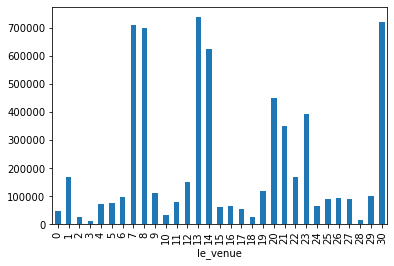

In [15]:
import matplotlib.pyplot as plt
encoded_df.groupby('le_venue')['total'].sum().plot.bar()

In [16]:
encoded_df['le_venue'].isnull().sum()

0

In [17]:
# Rearranging the columns
encoded_df = encoded_df[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad',
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5','le_venue','total']]

In [19]:
# Splitting the data into train and test set
X_train = encoded_df.drop("total",axis=1)[encoded_df['date'].dt.year <=2016]
X_test = encoded_df.drop("total",axis=1)[encoded_df['date'].dt.year > 2016]

In [20]:
y_train = encoded_df[encoded_df['date'].dt.year <=2016]['total'].values
y_test = encoded_df[encoded_df['date'].dt.year > 2016]['total'].values

In [21]:
X_train

,date,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,...,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,overs,runs,wickets,runs_last_5,wickets_last_5,le_venue
32,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.1,61,0,59,0,13
33,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.2,61,1,59,1,13
34,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.3,61,1,59,1,13
35,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.4,61,1,59,1,13
36,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.5,61,1,58,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68857,2016-05-29,0,0,0,0,0,0,0,1,0,...,0,0,1,0,19.2,194,7,54,4,13
68858,2016-05-29,0,0,0,0,0,0,0,1,0,...,0,0,1,0,19.3,200,7,56,4,13
68859,2016-05-29,0,0,0,0,0,0,0,1,0,...,0,0,1,0,19.4,201,7,56,4,13
68860,2016-05-29,0,0,0,0,0,0,0,1,0,...,0,0,1,0,19.5,202,7,57,4,13


In [22]:
# Removing the 'date' column
X_train.drop('date',axis=1,inplace=True)
X_test.drop('date',axis=1,inplace=True)

In [41]:
X_train.columns

Index(['bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad', 'overs', 'runs', 'wickets',
       'runs_last_5', 'wickets_last_5', 'le_venue'],
      dtype='object')

In [23]:
# --- Model Building ---
# Linear Regression Model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [24]:
y_pred= regressor.predict(X_test)

In [25]:
r2_score(y_test,y_pred=y_pred)

0.7522335578823874

In [26]:
# Creating a pickle file for the classifier
import pickle
filename = 'first-innings-score-lr-model.pkl'
pickle.dump(regressor, open(filename, 'wb'))

In [49]:
import pickle
with open("encoder.pkl", "wb") as f: 
    pickle.dump(encoder, f)

In [ ]:
encoder.transform

# Ridge Regression

In [27]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
parameters ={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor =GridSearchCV(ridge,param_grid=parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.10176e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.21417e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.65222e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [28]:
prediction = ridge_regressor.predict(X_test)

In [29]:
from sklearn.metrics import r2_score
r2_score(y_test,prediction)

0.752253625579641

In [30]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-328.9187441023083


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

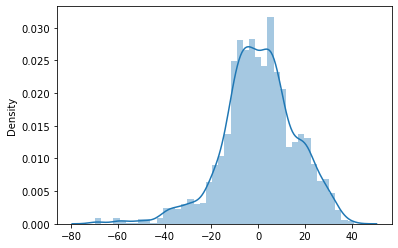

In [31]:
prediction=ridge_regressor.predict(X_test)
import seaborn as sns
sns.distplot(y_test-prediction)

In [32]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 12.1167067407938
MSE: 251.01778265492675
RMSE: 15.843540723428168


# Lasso Regression

In [33]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
parameters ={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor =GridSearchCV(lasso,param_grid=parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X_train,y_train)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4555306.115493403, tolerance: 2529.9556965945635
  model = cd_fast.enet_coordinate_descent(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4475308.673783278, tolerance: 2547.0380710286604
  model = cd_fast.enet_coordinate_descent(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4596178.420686824, tolerance: 2667.8126904366527
  model = cd_fast.enet_coordinate_descent(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [34]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1}
-321.31896072171827


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

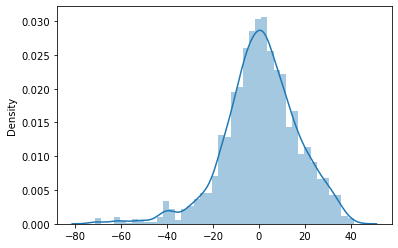

In [35]:
prediction=lasso_regressor.predict(X_test)
import seaborn as sns
sns.distplot(y_test-prediction)

In [36]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 12.235793160245493
MSE: 262.43617809232546
RMSE: 16.199882039457123


In [37]:
prediction

array([171.06846798, 174.45432928, 173.67726317, ..., 105.72545791,
       104.74740309,  98.83805   ])

In [38]:
from sklearn.metrics import r2_score
r2_score(y_test,prediction)

0.7409840412442463